# Transformada de Fourier

In [33]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq, ifft
import math
i = 1J

### Defininos y graficamos un primer pulso

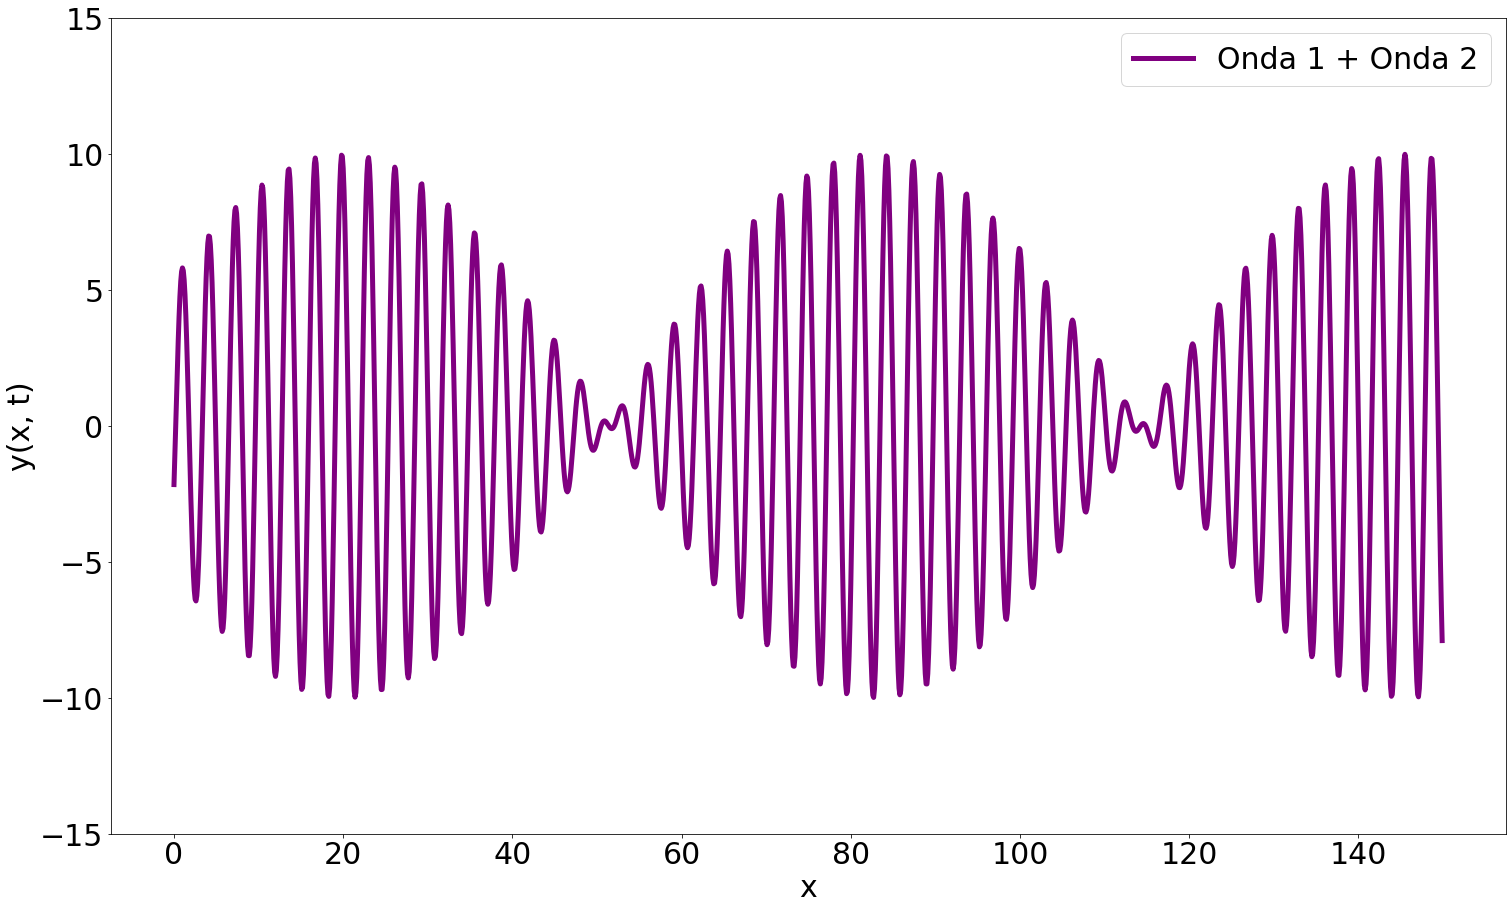

In [180]:
x = np.arange(0.01,150,0.1) # declaramos un arreglo de numeros para la posicion x de la onda
u=x
amp = 5 # Valor de la amplitud
w = 2 # valor de la velocidad angular
k= 2 # Valor del numero de onda
t=1 # Tiempo
y1 = amp*np.cos(w*t - k*x) # calculamos la funcion de onda en el intervalo xe
dw = 2 # Valor del desfase de la velocidad angular
dk = 0.1 # Valor del desfase del numero de onda
y2 = amp*np.cos((w + dw)*t + (k + dk)*x) # calculamos la funcion de onda en elintervalo x establecido
y3 = 2 * amp * np.cos(w*t-k*x)*np.cos(dw/2*t - dk/2*x)
dx= x[1] - x[0]
F1=np.zeros (len(x), dtype=complex)
plt.plot(x,y3, "-", color = 'purple', lw = 5, label="Onda 1 + Onda 2")
plt.xlabel("x")
plt.ylabel("y(x, t)")
plt.ylim(-15, 15)
plt.rcParams ["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size':30})
plt.legend()

### Calculamos la transformada de Fourier del primer pulso

Text(0, 0.5, 'F|(u)|')

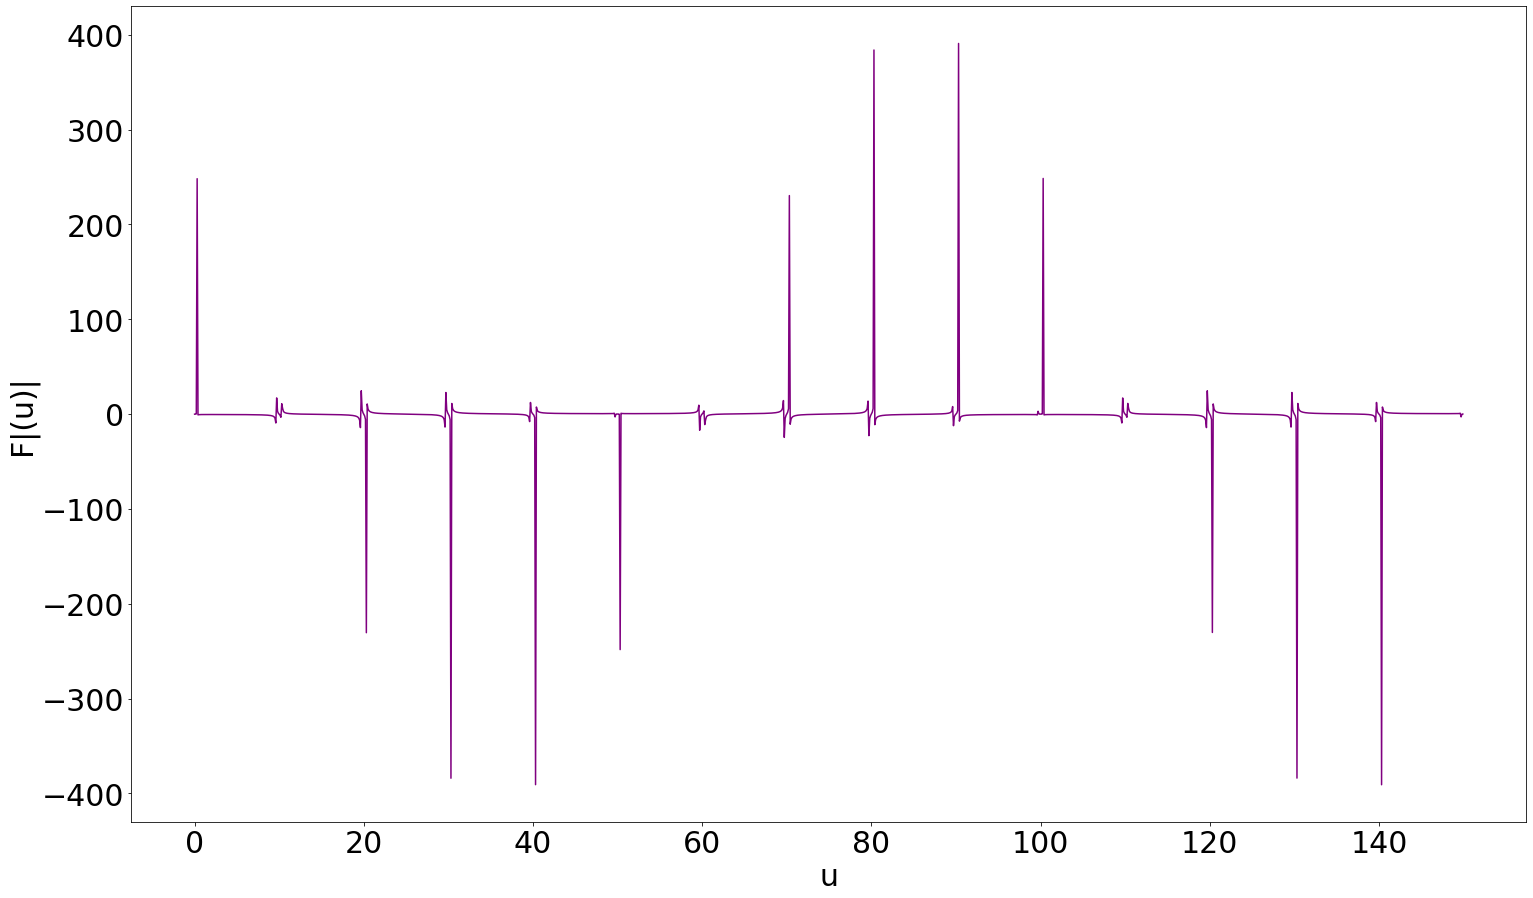

In [181]:
for n in range (0, len(x)):
    S=0
    for m in range (0, len (x)):
        S=S+y3 [m] *np.exp(-i*2*pi*u[n] *x[m] ) *dx
    F1 [n]=S
fig, ax = plt.subplots (figsize=(25,15))
plt.plot(u, np.real (F1), color='purple')
plt.xlabel("u")
plt.ylabel("F|(u)|")

### Defininos y graficamos un segundo pulso

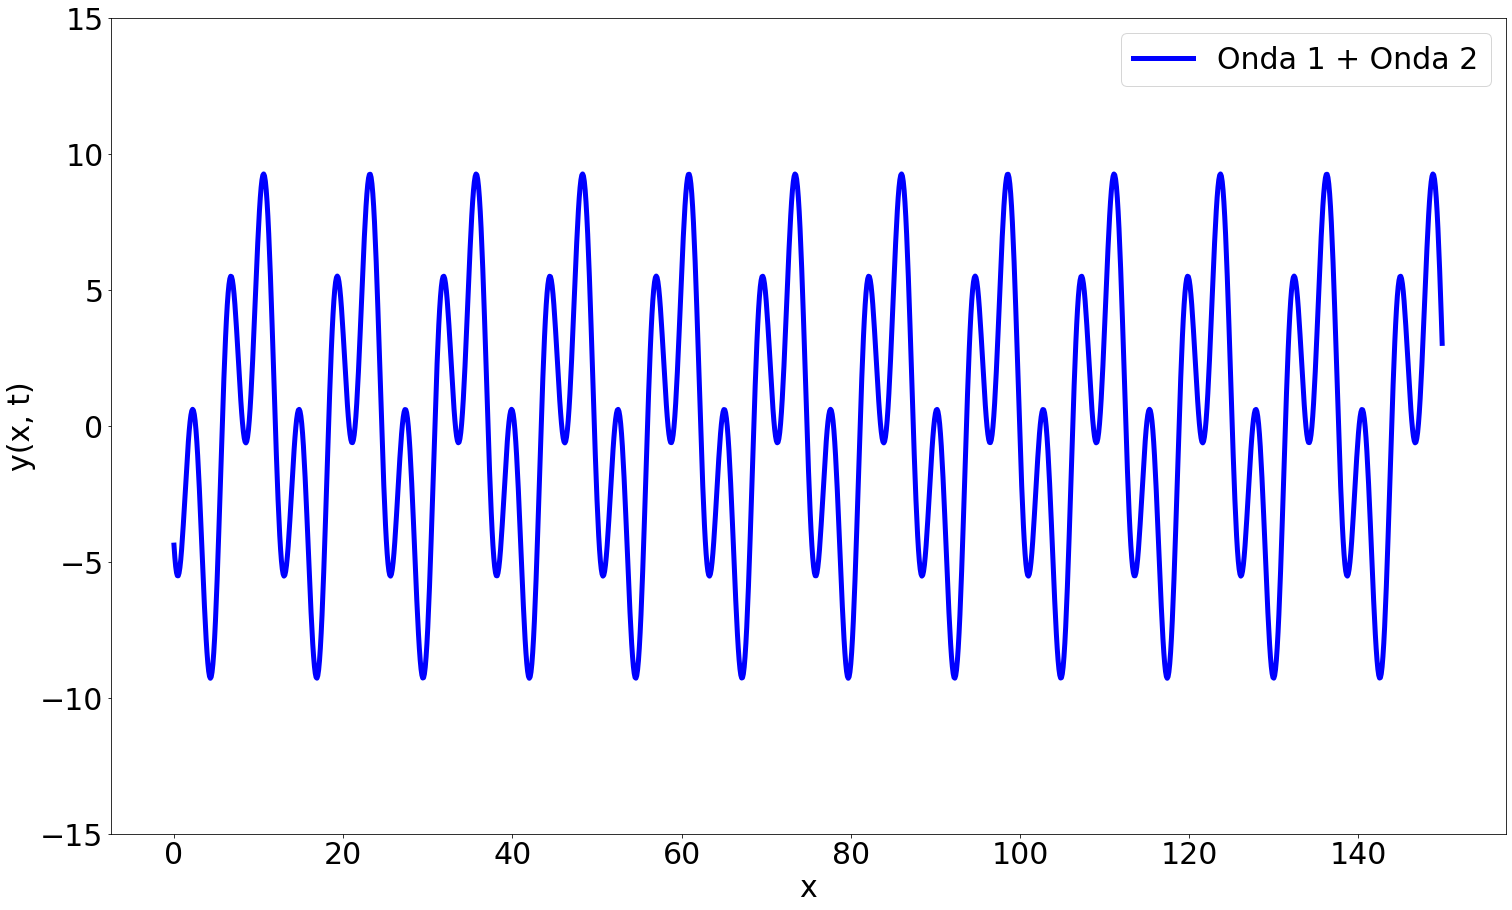

In [178]:
x = np.arange(0.01,150,0.1) # declaramos un arreglo de numeros para la posicion x de la onda
u=x
amp = 5 # Valor de la amplitud
w = 1 # valor de la velocidad angular
k= 1 # Valor del numero de onda
t=1 # Tiempo
y1 = amp*np.cos(w*t - k*x) # calculamos la funcion de onda en el intervalo xe
dw = 5 # Valor del desfase de la velocidad angular
dk = 1 # Valor del desfase del numero de onda
y2 = amp*np.cos((w + dw)*t + (k + dk)*x) # calculamos la funcion de onda en elintervalo x establecido
y4 = 2 * amp * np.cos(w*t-k*x)*np.cos(dw/2*t - dk/2*x)
dx= x[1] - x[0]
F1=np.zeros (len(x), dtype=complex)
plt.plot(x,y4, "-", color = 'blue', lw = 5, label="Onda 1 + Onda 2")
plt.xlabel("x")
plt.ylabel("y(x, t)")
plt.ylim(-15, 15)
plt.rcParams ["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size':30})
plt.legend()

### Calculamos la transformada de Fourier del segundo pulso

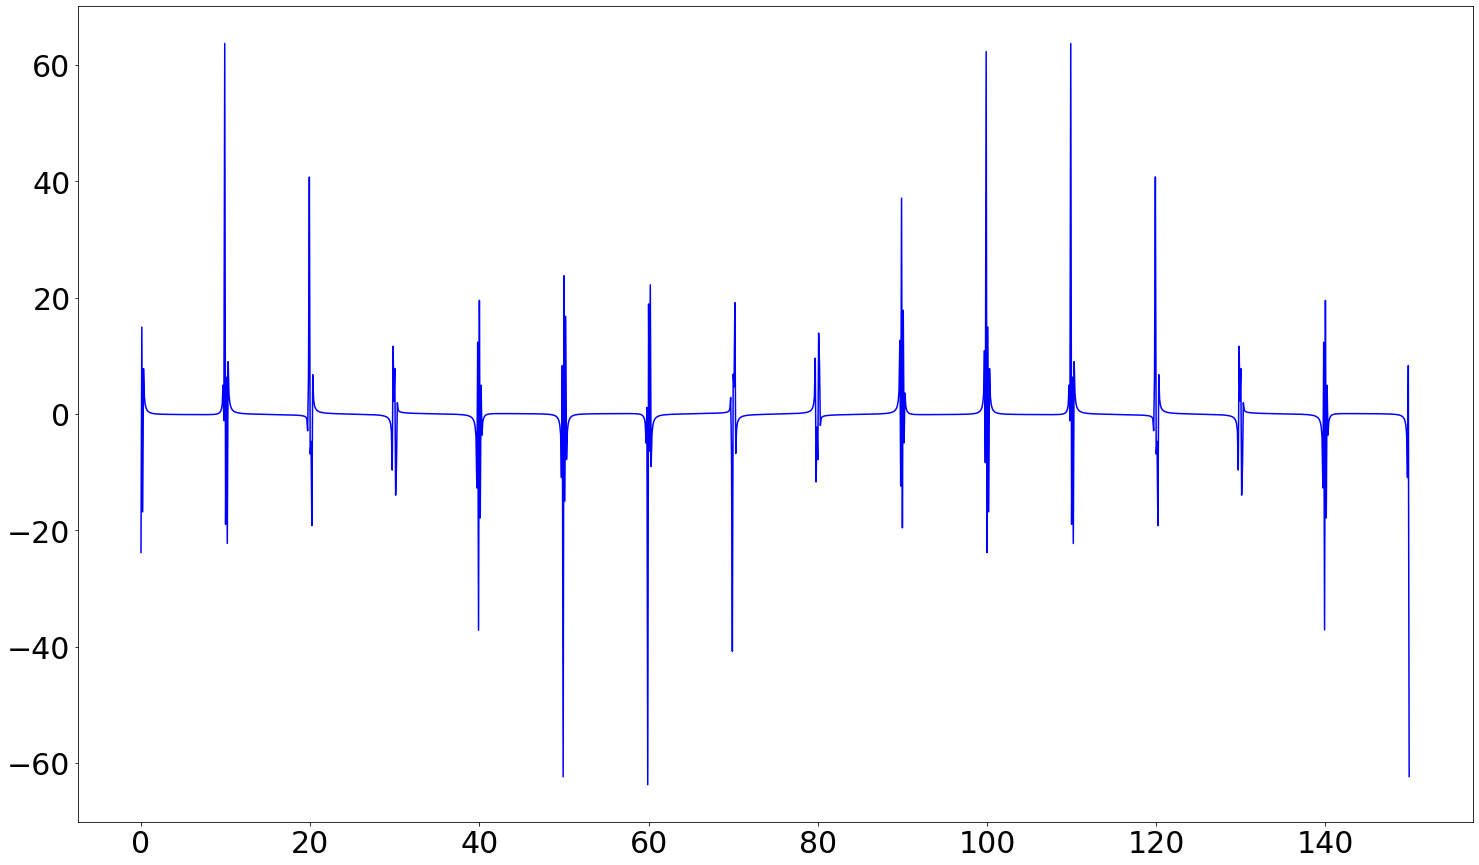

In [179]:
for n in range (0, len(x)):
    S=0
    for m in range (0, len (x)):
        S=S+y4 [m] *np.exp(-i*2*pi*u[n] *x[m] ) *dx
    F1 [n]=S
fig, ax = plt.subplots (figsize=(25,15))
plt.plot(u, np.real (F1), color='blue')
plt.xlabel("u")
plt.ylabel("F|(u)|")

## Ahora obtenemos la transformada de Fourier usando las librerias de Python

### Definimos una funcion y la evaluamos en un intervalo:

In [27]:
pi = 3.1415926
n=1000
x = np.linspace (-20, 20, n)
y1 = 5*np.cos (2*pi/3*x) +8*np.cos (2*pi/5*x) +11*np.cos (2*pi/7*x)

Text(0, 0.5, 'f(x')

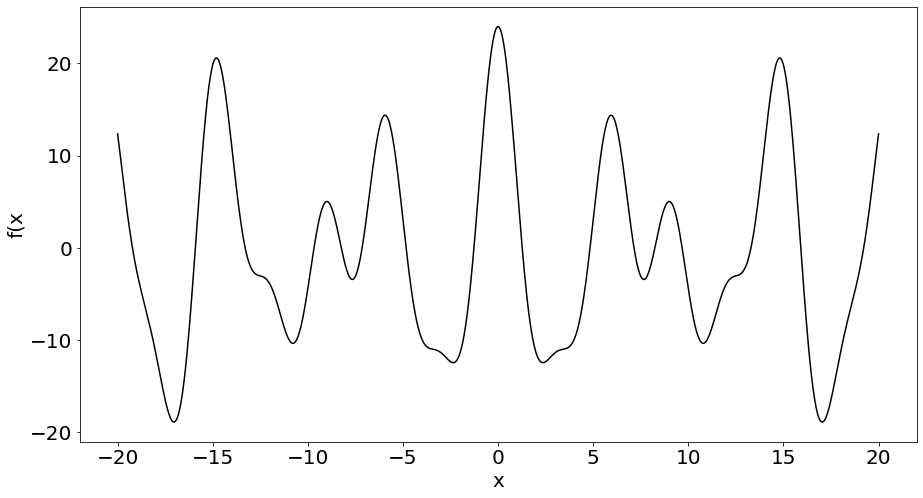

In [28]:
fig,ax = plt.subplots (figsize=(15, 8))
plt.rcParams.update({'font.size':20})
plt.plot (x, y1, "-", color = 'k')
plt.xlabel ("x")
plt.ylabel("f(x")

### Graficamos de forma independiente cada modo de vibracion

In [14]:
n=1000
x = np.linspace (-20, 20, n)
y1 = 5*np.cos (2*pi/3*x)
y2  =8*np.cos (2*pi/5*x)
y3 = 11*np.cos (2*pi/7*x)

Text(0, 0.5, 'f(x)')

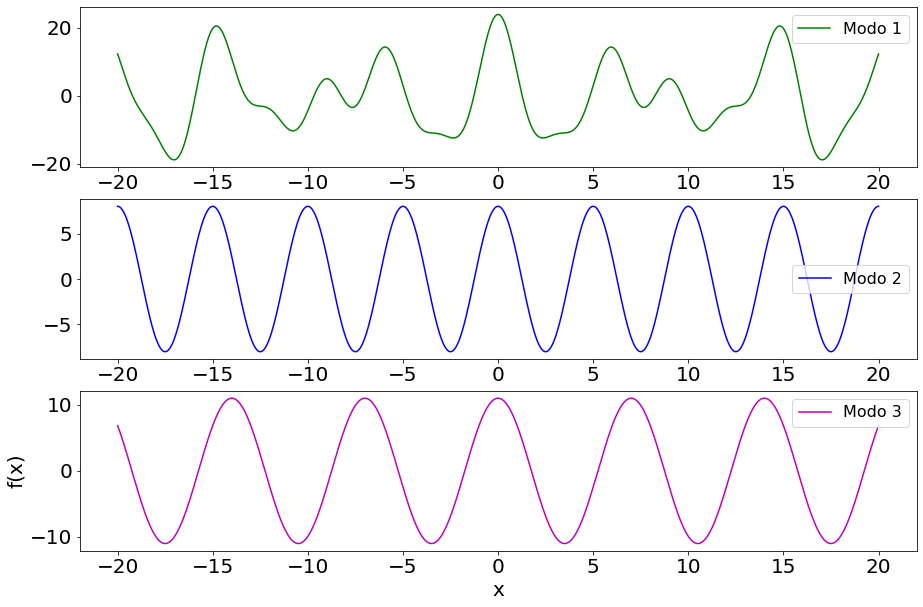

In [30]:
fig, axs = plt.subplots (3, figsize=(15, 10))
plt.rcParams.update({'font.size':16})
axs [0] .plot(x, y1, "-", color ='g', label= 'Modo 1')
axs[0].legend()
axs [1] .plot(x, y2, "-", color = 'b', label= 'Modo 2')
axs [1] .legend()
axs [2] .plot(x, y3, "-", color = 'm', label= 'Modo 3')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

### Obtenemos la Transformada de Fourier de f(x) usando la funcion fft()

(0.0, 0.4)

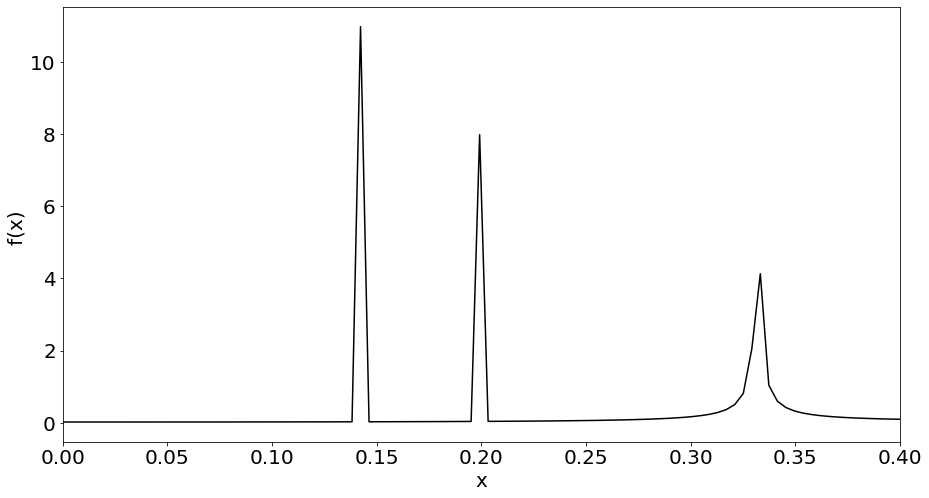

In [32]:
Fs = 1 # Freg de muestreo >= 2*freq_max
Ts=1/Fs # Periodo de muestreo
L =246# Longitud de de las muestras, el doble que F's
t = np.arange (0, L-1, 1) *Ts #Vector tiempo
s = 5*np.cos (2*pi*1/3*t) +8*np.cos (2*pi*1/5*t)+11*np.cos (2*pi*1/7*t)
Y=fft(s)
P1 = 2* (np.abs (Y[0:int (L/2)]/L))
f = Fs*np.arange (0, int (L/2), 1)/L

fig, ax = plt.subplots (figsize=(15, 8))
plt.rcParams.update ({'font.size':20})
plt.plot(f, P1, "-", color = 'k')
#plt.plot(t,s, "-", color = 'k')
plt.xlabel("x")
plt.ylabel("f(x) ")
plt.xlim(0,0.4)

### Definimos y graficamos un par de funciones Sinc:

In [106]:
a=.1
b=1
x = np.linspace (-35, 35, 1000)
f1= np.sin (pi*a*x) ## /(pi*a*x)
f2= np.sin (pi*b*x) ## / (pi*b*x)
u=x
dx= x[1] - x[0]
F1=np.zeros (len(x), dtype=complex)
F2=np.zeros (len(x), dtype=complex)
F3=np.zeros (len (x), dtype=complex)

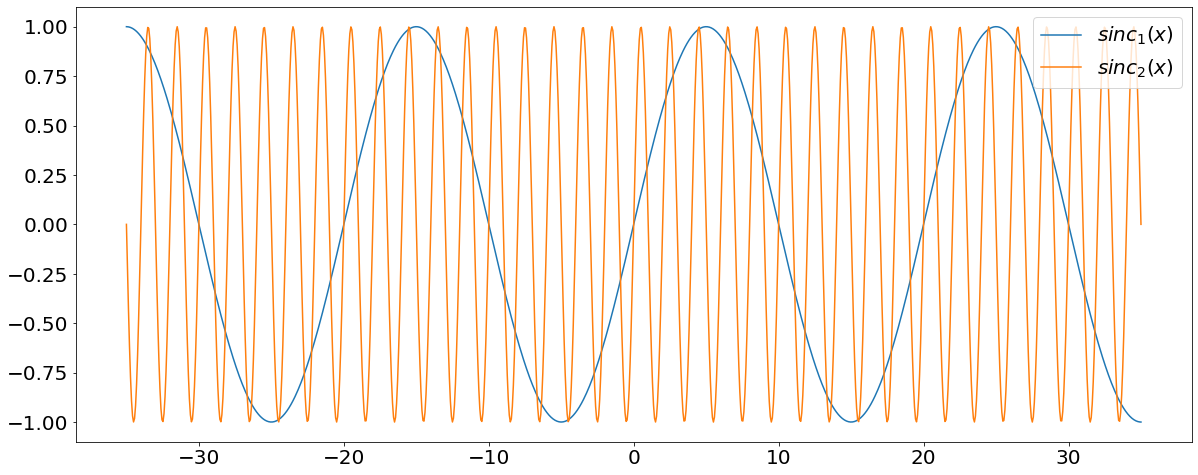

In [107]:
fig, ax = plt.subplots (figsize=(20, 8))
plt.plot(x, f1, label='$sinc_{1} (x) $')
plt.plot(x, f2, label='$sinc_{2} (x) $')
plt.legend()

### Calculamos la transformada de Fourier de la primera funcion:

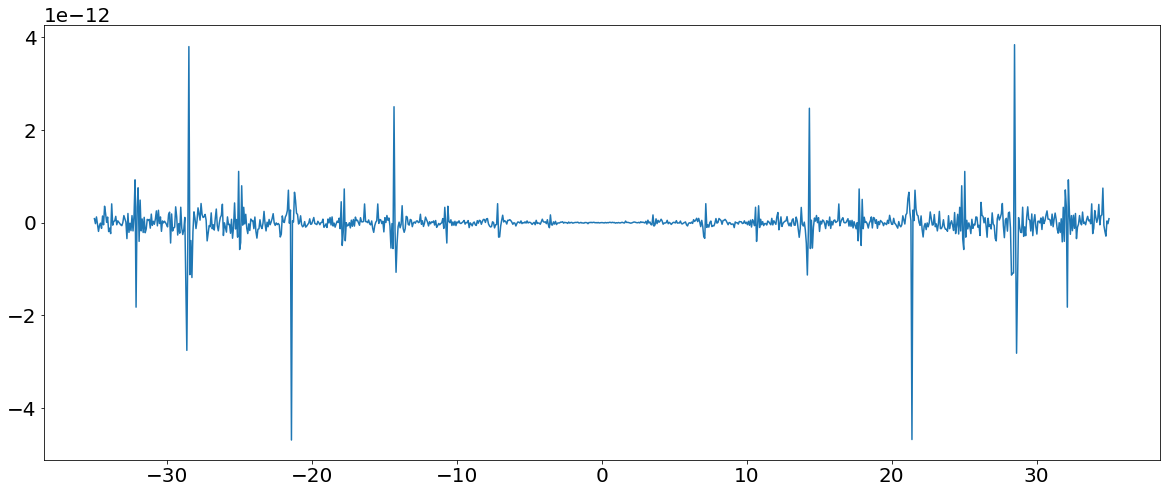

In [108]:
for n in range (0, len(x)):
    S=0
    for m in range (0, len(x)) :
        S=S+f1[m] *np.exp(-i*2*pi*u[n]*x[m] ) *dx
    F1[n]=S
fig, ax = plt.subplots (figsize=(20, 8))
plt.plot(u, np.real (F1))

### Calculamos la transformada de Fourier de la segunda funcion:

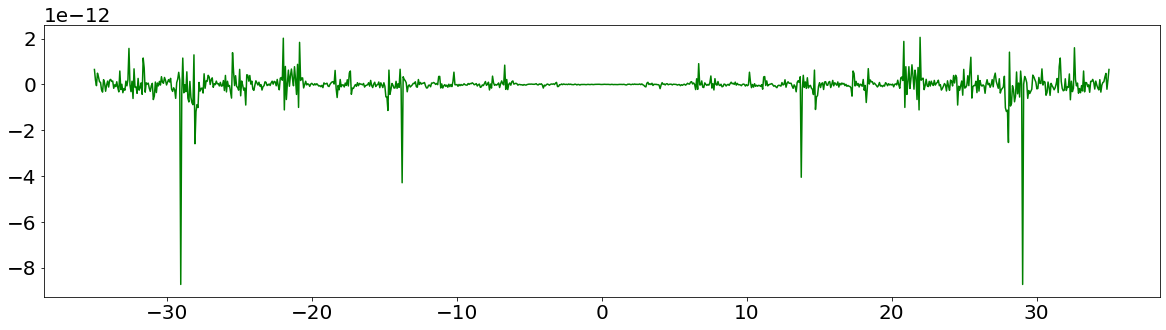

In [109]:
for n in range (0, len(x)):
    S=0
    for m in range (0, len (x)):
        S=S+f2 [m] *np.exp(-i*2*pi*u[n] *x[m] ) *dx
    F2 [n]=S
fig, ax = plt.subplots (figsize=(20, 5))
plt.plot(u, np.real (F2), color='green')